In [174]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [175]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [176]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as sql
from sqlalchemy import desc
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [177]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

conn = engine.connect()

In [178]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [179]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [180]:
# Save references to each table
Station = Base.classes.station

Measurement = Base.classes.measurement

In [181]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [182]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(desc(Measurement.date)).first()

most_recent
latest_date = most_recent[0]

str(latest_date)

latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')

latest_date = latest_date.strftime('%Y-%m-%d')

latest_date

('2017-08-23',)

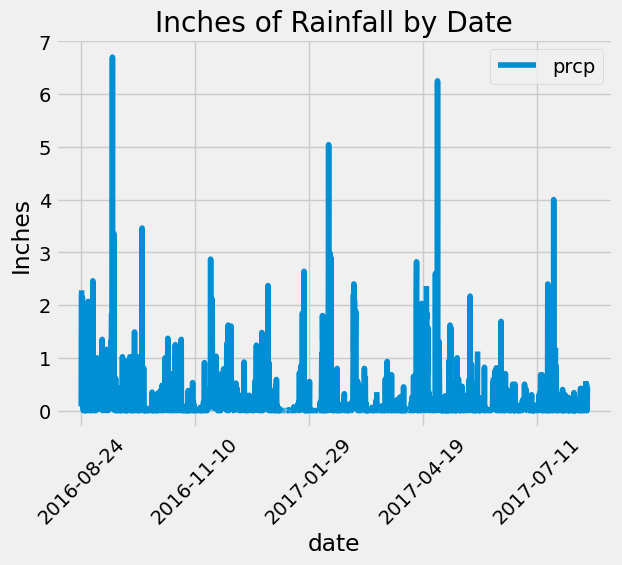

In [184]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_before = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
#year_before

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=year_before).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precipitation_data)

# Sort the dataframe by date
precip_df = precip_df.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.title("Inches of Rainfall by Date")
plt.ylabel("Inches")
plt.xticks(rotation = 45)
plt.show()


In [185]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [186]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [187]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(desc(func.count(Measurement.tobs)))

most_active = active_stations[0]
# List the stations and their counts in descending order.
for stations in active_stations:
    print(stations)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [188]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0]

temps = session.query(Measurement.station,func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active[0]).all()

print(temps)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


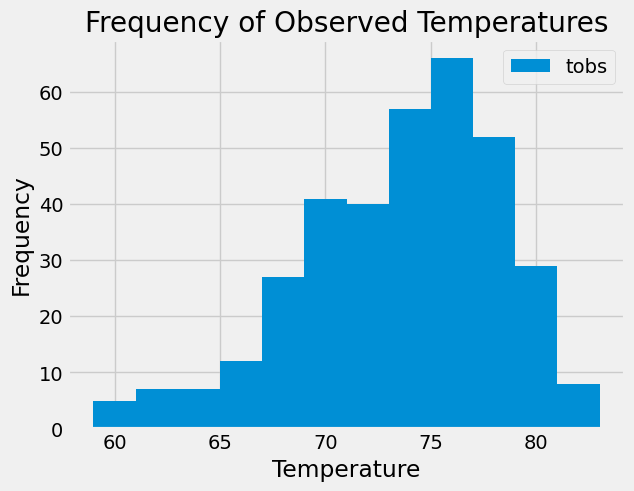

In [189]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >= year_before).filter(Measurement.station == most_active[0]).order_by(Measurement.date).order_by(Measurement.date).all()

temp_df = pd.DataFrame(temp_data)

temp_df = temp_df.set_index('date')

temp_df.plot(kind='hist', bins = 12)
plt.xlabel("Temperature")
plt.title("Frequency of Observed Temperatures")
plt.show()





# Close Session

In [190]:
# Close Session
session.close()